**复习：**回顾学习完第一章，我们对泰坦尼克号数据有了基本的了解，也学到了一些基本的统计方法，第二章中我们学习了数据的清理和重构，使得数据更加的易于理解；今天我们要学习的是第二章第三节：**数据可视化**，主要给大家介绍一下Python数据可视化库Matplotlib，在本章学习中，你也许会觉得数据很有趣。在打比赛的过程中，数据可视化可以让我们更好的看到每一个关键步骤的结果如何，可以用来优化方案，是一个很有用的技巧。

# 2 第二章：数据可视化

#### 开始之前，导入numpy、pandas以及matplotlib包和数据

In [2]:
# 加载所需的库
# 如果出现 ModuleNotFoundError: No module named 'xxxx'
# 你只需要在终端/cmd下 pip install xxxx 即可
# %matplotlib inline 图片内嵌在网页中
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#加载result.csv这个数据
# 编译时无需转译
df = pd.read_csv(r'result.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.7 如何让人一眼看懂你的数据？
《Python for Data Analysis》第九章

#### 2.7.1 任务一：跟着书本第九章，了解matplotlib，自己创建一个数据项，对其进行基本可视化

Text(0.5, 1.0, 'test1')

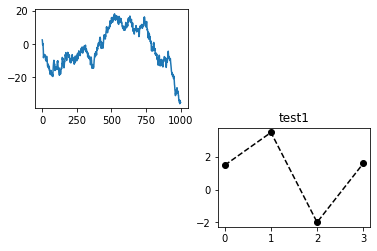

In [20]:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 4)
plt.plot([1.5, 3.5, -2, 1.6], 'ko--')
ax1.plot(np.random.randn(1000).cumsum())
ax2.set_title('test1')

【思考】最基本的可视化图案有哪些？分别适用于那些场景？（比如折线图适合可视化某个属性值随时间变化的走势）

#### 2.7.2 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）。

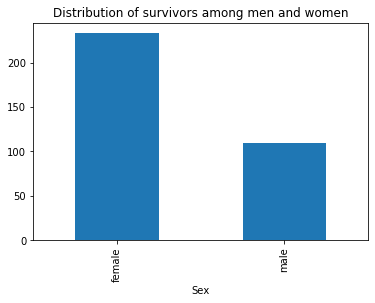

In [26]:
survive_sex = df.groupby('Sex')['Survived'].sum()
survive_sex.plot.bar()
plt.title('Distribution of survivors among men and women')
plt.show()

【思考】计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示？如何和男女生存人数可视化柱状图结合到一起？看到你的数据可视化，说说你的第一感受（比如：你一眼看出男生存活人数更多，那么性别可能会影响存活率）。

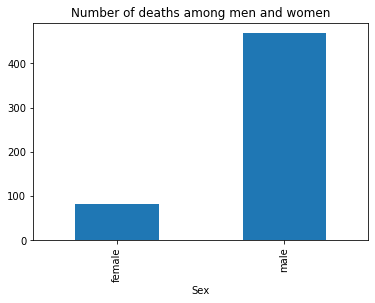

In [32]:
#男女中死亡人数
df_dead = df[df['Survived'] == 0]
death_doll = df_dead.groupby('Sex')['Survived'].count()
death_doll.plot.bar()
plt.title('Number of deaths among men and women')
plt.show()

#### 2.7.3 任务三：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）。

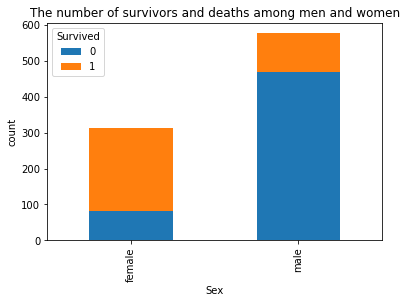

In [45]:
# 提示：计算男女中死亡人数 1表示生存，0表示死亡
# unstack 表示转为 DataFrame
df_survive = df.groupby(['Sex'])['Survived'].value_counts().unstack()
df_survive.plot.bar(stacked='True')
plt.title('The number of survivors and deaths among men and women')
plt.ylabel('count')
plt.show()

【提示】男女这两个数据轴，存活和死亡人数按比例用柱状图表示

#### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）

【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

**排序有助于分析数据，对数据变化的感受更清晰**

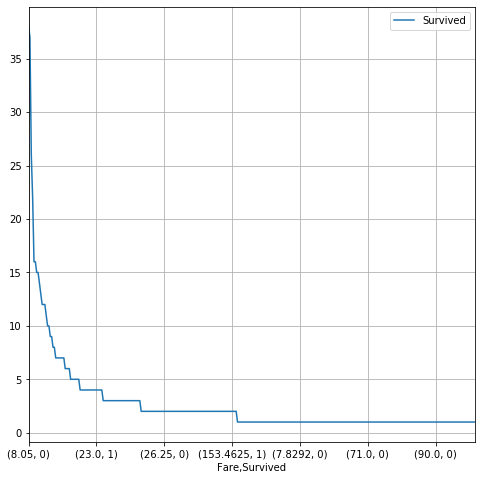

In [59]:
# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡

# 1. 排序
# 定义窗口尺寸
fig = plt.figure(figsize=(8, 8))
# 降序
df_sort = df.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
# grid=True 底部栅格
df_sort.plot(grid=True)
# 右上角标识
plt.legend()
plt.show()

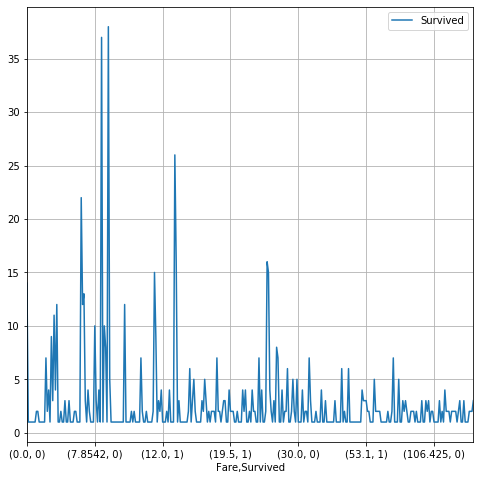

In [60]:
# 2.不排序
fig = plt.figure(figsize=(8, 8))
# 降序
df_no_sort = df.groupby(['Fare'])['Survived'].value_counts()
# grid=True 底部栅格
df_no_sort.plot(grid=True)
# 右上角标识
plt.legend()
plt.show()

#### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

In [4]:
# 1表示生存，0表示死亡
df_survive_pclass = df.groupby(['Pclass'])['Survived'].value_counts()
df_survive_pclass

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

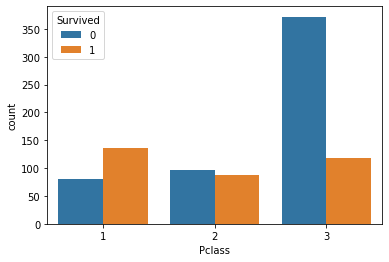

In [7]:
# Seaborn的底层是基于Matplotlib的
# http://seaborn.pydata.org/generated/seaborn.countplot.html
import seaborn as sns
sns.countplot(x="Pclass", hue="Survived", data=df)

【思考】看到这个前面几个数据可视化，说说你的第一感受和你的总结

相比普通的柱状图而言，堆积柱状体比较难直观的看出某一值的变化情况，更适合看某一值在当前情况下所占的比例变化

#### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

In [17]:
# 1表示生存，0表示死亡
df_survive_age = df.groupby(['Age'])['Survived'].value_counts().unstack()
df_survive_age

Survived,0,1
Age,,
0.42,NaN,1.0
0.67,NaN,1.0
0.75,NaN,2.0
0.83,NaN,2.0
0.92,NaN,1.0
...,...,...
70.00,2.0,NaN
70.50,1.0,NaN
71.00,2.0,NaN


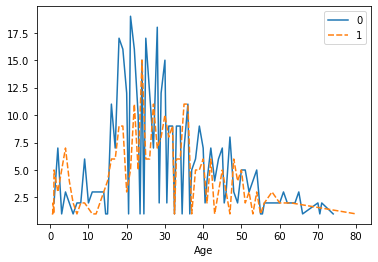

In [27]:
sns.lineplot(data=df_survive_age)

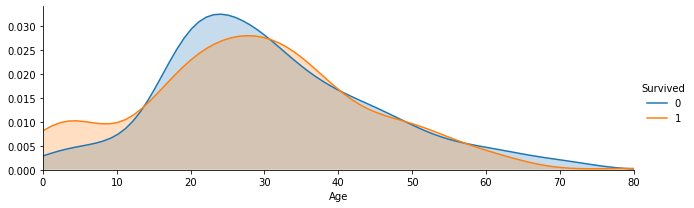

In [25]:
facet = sns.FacetGrid(df, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

#### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

In [29]:
df_pclass_age = df.groupby(['Age'])['Pclass'].value_counts().unstack()
df_pclass_age

Pclass,1,2,3
Age,,,
0.42,NaN,NaN,1.0
0.67,NaN,1.0,NaN
0.75,NaN,NaN,2.0
0.83,NaN,2.0,NaN
0.92,1.0,NaN,NaN
...,...,...,...
70.00,1.0,1.0,NaN
70.50,NaN,NaN,1.0
71.00,2.0,NaN,NaN


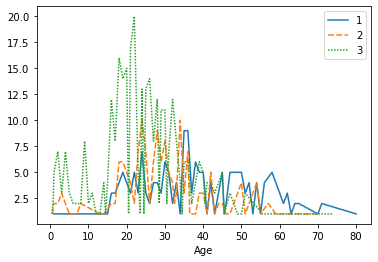

In [30]:
sns.lineplot(data=df_pclass_age)

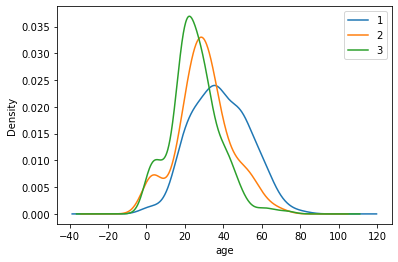

In [33]:
# ‘kde’ : Kernel Density Estimation plot  密度
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend
plt.legend((1,2,3),loc="best")

【思考】上面所有可视化的例子做一个总体的分析，你看看你能不能有自己发现

* 男性比女性死亡的人数更多，虽然女性的总人数比男性少，但存活率更高
* 低票价的死亡人数远多于高票价，其中可能也包含低票价的基数更大的影响
* 不同仓位等级的存活总人数差别不大，高仓位的略高，但低仓位的死亡人数占比远高于高仓位
* 青年是乘客的主要人群，死亡率和存活率比较接近，幼儿的存活率高于死亡率，老年的死亡率高于存活率


【总结】到这里，我们的可视化就告一段落啦，如果你对数据可视化极其感兴趣，你还可以了解一下其他可视化模块，如：pyecharts，bokeh等。

如果你在工作中使用数据可视化，你必须知道数据可视化最大的作用不是炫酷，而是最快最直观的理解数据要表达什么，你觉得呢？